In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the training log file
log_file = '/export/home/darpan/work_dir/cvProject/src/SimCLR/runs/Mar25_11-51-42_node3/training.log'
with open(log_file, 'r') as f:
    lines = f.readlines()

# get the loss and accuracy values
loss = []
accuracy = []
for line in lines[2:-2]:
    l = line.split()
    loss.append(float(l[3]))
    accuracy.append(float(l[6]))

In [3]:
print(max(accuracy))

82.8125


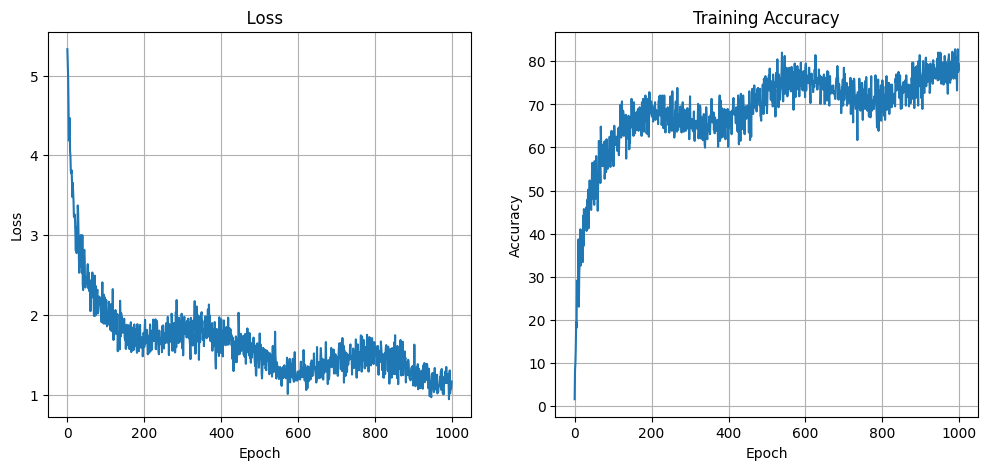

In [13]:
# plot the loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('  Loss')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid()
plt.savefig('loss_accuracy.png')
plt.show()

In [8]:
from models.resnet_simclr import ResNetSimCLR
import torch
from torchvision import models
from simclr import SimCLR

In [10]:
model = ResNetSimCLR(base_model='resnet18', out_dim=128)
model.load_state_dict(torch.load('/export/home/darpan/work_dir/cvProject/src/SimCLR/runs/Mar25_11-51-42_node3/checkpoint_1000.pth.tar')['state_dict'])
model.eval()

/export/home/darpan/anaconda3/envs/myenv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/export/home/darpan/anaconda3/envs/myenv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_3172562/284307740.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `we

ResNetSimCLR(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [ ]:
# random input 
x = torch.randn(1, 3, 224, 224)
# forward pass
with torch.no_grad():
    out = model(x)
    print(out.shape)  # should be (1, 128)

torch.Size([1, 128])
